# DeepVoice3: Single-speaker text-to-speech demo

In this notebook, you can try DeepVoice3-based single-speaker text-to-speech (en) using a model trained on [LJSpeech dataset](https://keithito.com/LJ-Speech-Dataset/). The notebook is supposed to be executed on [Google colab](https://colab.research.google.com) so you don't have to setup your machines locally.

**Estimated time to complete**: 5 miniutes.

- Code: https://github.com/r9y9/deepvoice3_pytorch
- Audio samples: https://r9y9.github.io/deepvoice3_pytorch/

## Setup

### Install dependencies

In [1]:
import os
from os.path import exists, join, expanduser

# Clone
name = "deepvoice3_pytorch"
if not exists(name):
  ! git clone https://github.com/r9y9/$name

Cloning into 'deepvoice3_pytorch'...
remote: Enumerating objects: 1151, done.
remote: Total 1151 (delta 0), reused 0 (delta 0), pack-reused 1151
Receiving objects: 100% (1151/1151), 6.94 MiB | 11.63 MiB/s, done.
Resolving deltas: 100% (643/643), done.


In [3]:
# Remove lws on line 87 and install it manually

! pip install lws

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lws: filename=lws-1.2.7-cp310-cp310-linux_x86_64.whl size=882244 sha256=f09cee87b070ecc003cbba7b8c7a92ae4bef6f0816d035821b96b27f19cad026
  Stored in directory: /root/.cache/pip/wheels/dd/a5/1d/128a4bfe012ed17e1eee69acfdcd5f67c5ea291194f0599925
Successfully built lws


In [2]:
# Change working directory to the project dir 
# os.chdir(join(expanduser("~"), name))
os.chdir("deepvoice3_pytorch")

!git checkout 7a10ac6763eda92595e257543494b6a95f64229b --quiet

# Install dependencices
!pip install -q -e '.[bin]'

error: Your local changes to the following files would be overwritten by checkout:
	setup.py
Please commit your changes or stash them before you switch branches.
Aborting
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.8/276.8 kB 20.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [4]:
%pylab inline
! pip install -q librosa nltk

import torch
import numpy as np
import librosa
import librosa.display
import IPython
from IPython.display import Audio
# need this for English text processing frontend
import nltk
! python -m nltk.downloader cmudict

Populating the interactive namespace from numpy and matplotlib
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


### Download a pre-trained model

In [5]:
preset = "20180505_deepvoice3_ljspeech.json"
checkpoint_path = "20180505_deepvoice3_checkpoint_step000640000.pth"

In [6]:
if not exists(preset):
  !curl -O -L "https://www.dropbox.com/s/0ck82unm0bo0rxd/20180505_deepvoice3_ljspeech.json"
if not exists(checkpoint_path):
  !curl -O -L "https://www.dropbox.com/s/5ucl9remrwy5oeg/20180505_deepvoice3_checkpoint_step000640000.pth"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17    0    17    0     0     36      0 --:--:-- --:--:-- --:--:--    36
100   340  100   340    0     0    351      0 --:--:-- --:--:-- --:--:--   351
100  1795  100  1795    0     0   1257      0  0:00:01  0:00:01 --:--:--  4650
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17    0    17    0     0     19      0 --:--:-- --:--:-- --:--:--    19
100   340  100   340    0     0    241      0  0:00:01  0:00:01 --:--:--   241
100   534    0   534    0     0    216      0 --:--:--  0:00:02 --:--:--   639
100  151M  100  151M    0     0  14.9M      0  0:00:10  0:00:10 --:--:-- 22.2M


## Synthesis

### Setup hyper parameters

In [7]:
import hparams
import json

    
# Load parameters from preset
with open(preset) as f:
  hparams.hparams.parse_json(f.read())
  
# Inject frontend text processor
import synthesis
import train
from deepvoice3_pytorch import frontend
synthesis._frontend = getattr(frontend, "en")
train._frontend =  getattr(frontend, "en")

# alises
fs = hparams.hparams.sample_rate
hop_length = hparams.hparams.hop_size

/content/deepvoice3_pytorch/deepvoice3_pytorch/frontend/text/__init__.py:75: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  return s in _symbol_to_id and s is not '_' and s is not '~'
/content/deepvoice3_pytorch/deepvoice3_pytorch/frontend/text/__init__.py:75: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  return s in _symbol_to_id and s is not '_' and s is not '~'


### Define utility functions

In [8]:
def tts(model, text, p=0, speaker_id=None, fast=True, figures=True):
  from synthesis import tts as _tts
  waveform, alignment, spectrogram, mel = _tts(model, text, p, speaker_id, fast)
  if figures:
      visualize(alignment, spectrogram)
  IPython.display.display(Audio(waveform, rate=fs))
  
def visualize(alignment, spectrogram):
  label_fontsize = 16
  figure(figsize=(16,16))

  subplot(2,1,1)
  imshow(alignment.T, aspect="auto", origin="lower", interpolation=None)
  xlabel("Decoder timestamp", fontsize=label_fontsize)
  ylabel("Encoder timestamp", fontsize=label_fontsize)
  colorbar()

  subplot(2,1,2)
  librosa.display.specshow(spectrogram.T, sr=fs, 
                           hop_length=hop_length, x_axis="time", y_axis="linear")
  xlabel("Time", fontsize=label_fontsize)
  ylabel("Hz", fontsize=label_fontsize)
  tight_layout()
  colorbar()

### Load the model checkpoint

In [9]:
from train import build_model
from train import restore_parts, load_checkpoint

model = build_model()
model = load_checkpoint(checkpoint_path, model, None, True)

Load checkpoint from: 20180505_deepvoice3_checkpoint_step000640000.pth


### Generate speech

In [10]:
# Try your favorite senteneces:)
texts = [
    "Scientists at the CERN laboratory say they have discovered a new particle.",
    "There's a way to measure the acute emotional intelligence that has never gone out of style.",
    "President Trump met with other leaders at the Group of 20 conference.",
    "The Senate's bill to repeal and replace the Affordable Care Act is now imperiled.",
    "Generative adversarial network or variational auto-encoder.",
    "The buses aren't the problem, they actually provide a solution.",
    "peter piper picked a peck of pickled peppers how many peppers did peter piper pick.",
    "Some have accepted this as a miracle without any physical explanation.",
]

for idx, text in enumerate(texts):
  print(idx, text)
  tts(model, text, figures=False)

0 Scientists at the CERN laboratory say they have discovered a new particle.


1 There's a way to measure the acute emotional intelligence that has never gone out of style.


2 President Trump met with other leaders at the Group of 20 conference.


3 The Senate's bill to repeal and replace the Affordable Care Act is now imperiled.


4 Generative adversarial network or variational auto-encoder.


5 The buses aren't the problem, they actually provide a solution.


6 peter piper picked a peck of pickled peppers how many peppers did peter piper pick.


7 Some have accepted this as a miracle without any physical explanation.


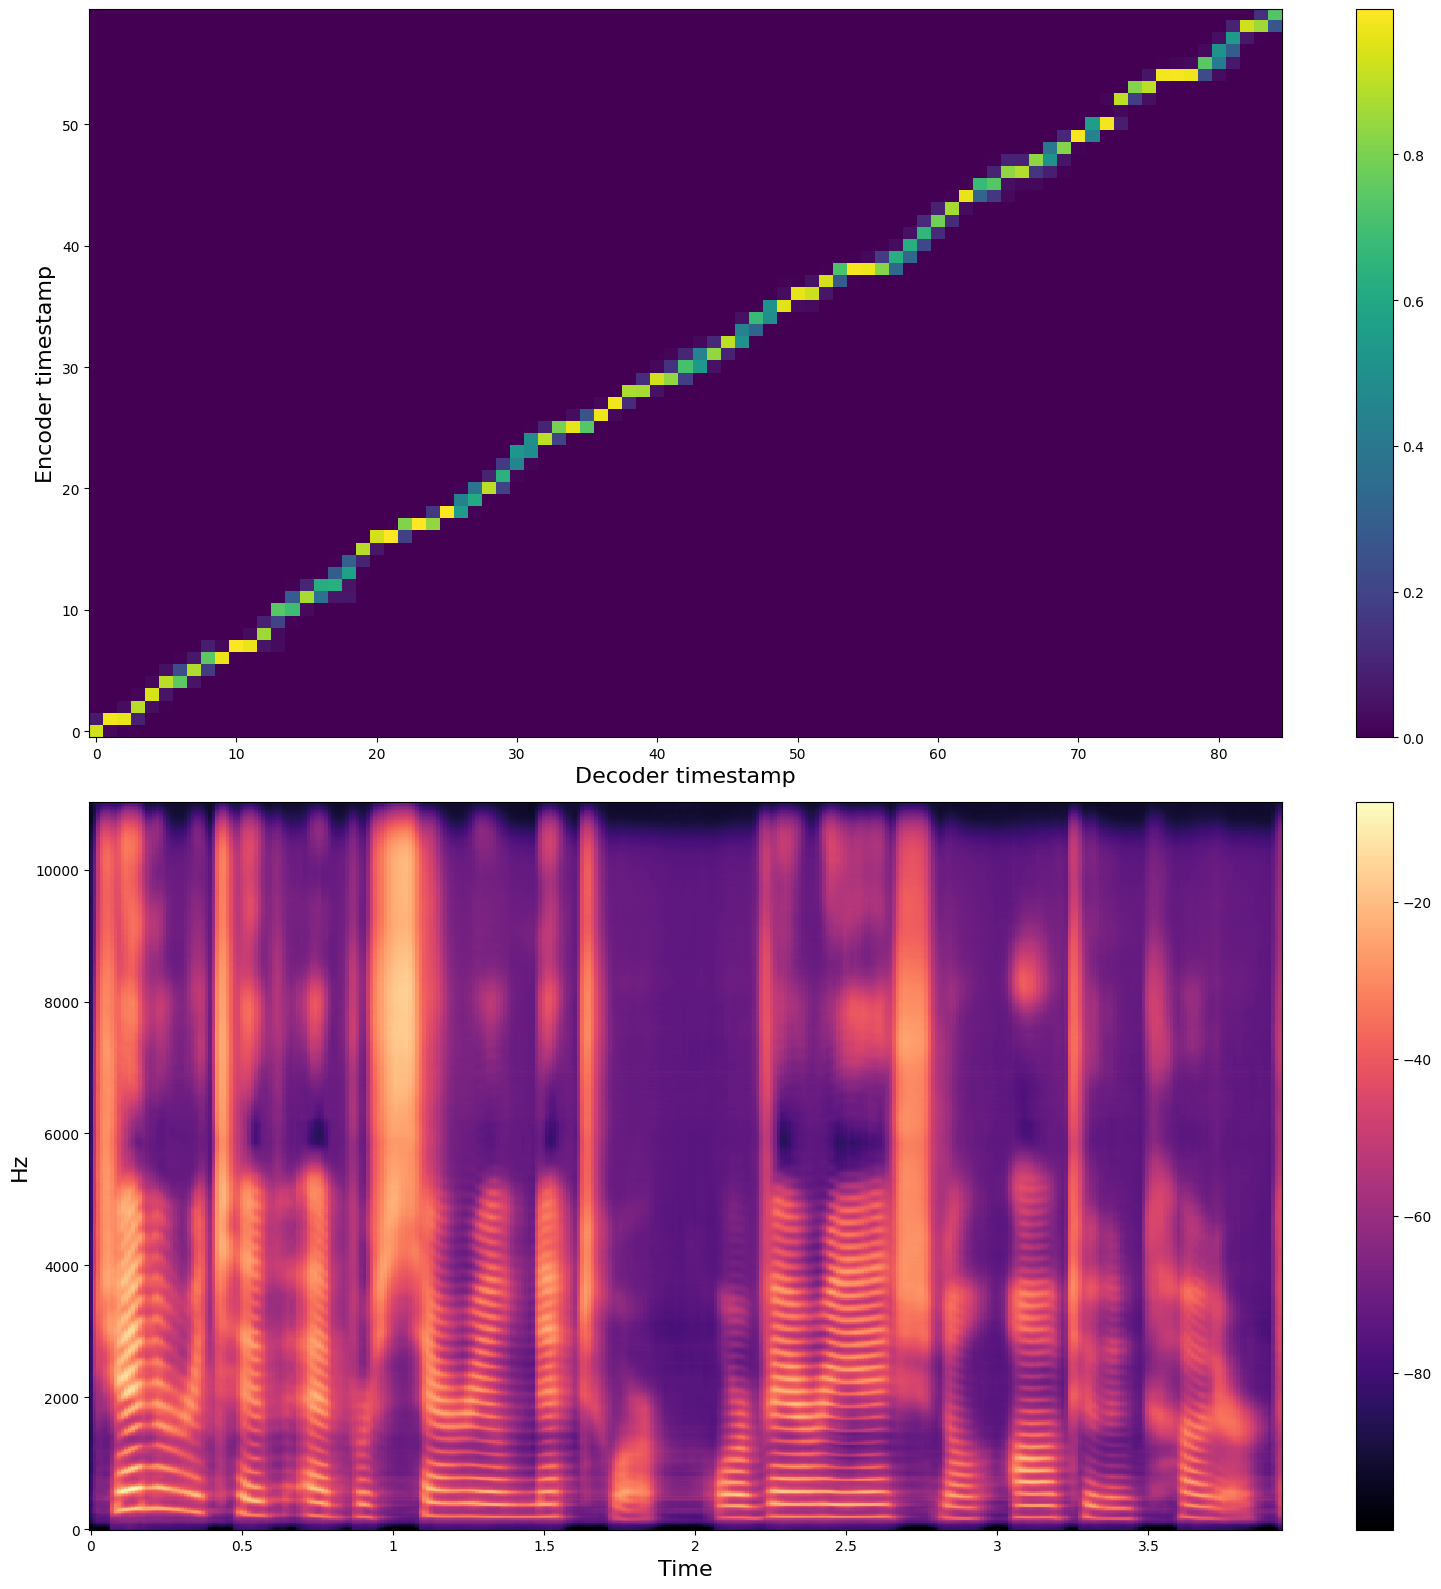

In [11]:
# With attention plot
text = "Generative adversarial network or variational auto-encoder."
tts(model, text, figures=True)

For details, please visit https://github.com/r9y9/deepvoice3_pytorch